In [1]:
# 装载谷歌云端硬盘
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/My Drive/')

['Colab',
 'chapter_1',
 'images',
 '02_end_to_end_machine_learning_project.ipynb',
 'xgboost.ipynb',
 'feature_extraction_preprocessing.ipynb',
 'mxne_AWS.ipynb',
 'data',
 'instacart-market-basket-analysis.ipynb',
 'LRU.ipynb',
 'ngrok',
 'codes',
 'ngrok-stable-linux-amd64.zip',
 'content',
 'Colab Notebooks']

In [3]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv("/content/drive/My Drive/data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

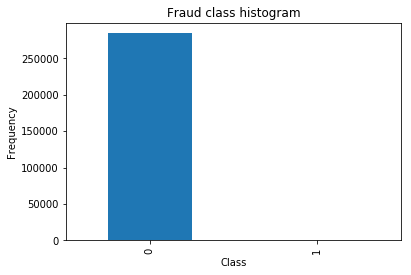

In [4]:
count_class = pd.value_counts(data['Class'], sort=True).sort_index()
count_class.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
# 样本不均衡，过采样(使得各类别中样本数一样多)与降采样(使得各类别中样本数一样少)
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("/content/drive/My Drive/data/creditcard.csv")
# print(data['Amount'].values)  # 将数据转为list

# 对于某个特征值分布比较大，将进行归一化或者标准化
# 归一化是将样本的特征值转换到同一量纲下把数据映射到[0,1]或者[-1, 1]区间内，仅由变量的极值决定.
# 标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，转换为标准正态分布，和整体样本分布相关，每个样本点都能对标准化产生影响。
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# 删除无用特征
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

# 下采样的策略
x = data.ix[:, data.columns != 'Class'] # 获取所有特征
y = data.ix[:, data.columns == 'Class'] # 获取样本的类别

# 获取样本类别为1的样本个数
number_records_fraud = len(data[data.Class == 1])
# print(number_records_fraud)  # 492
fraud_indices = np.array(data[data.Class == 1].index)
# print(fraud_indices)

# 挑选出正常样本数的索引
normal_indices = data[data.Class == 0].index
# print(normal_indices)

# 随机选择number_records_fraud个的正样本的索引
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)

# print(type(random_normal_indices))
random_normal_indices = np.array(random_normal_indices)
# print(len(random_normal_indices))
# 下采样的索引
under_sample_data = np.concatenate([fraud_indices, random_normal_indices])
# 根据索引去定位样本
under_sample_data = data.iloc[under_sample_data, :]

# print(under_sample_data)
# 获取下采样的样本特征和类别
X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
Y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# 显示比例
print("正常交易的百分比：", len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print("异常交易的百分比：", len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("总的样本个数：", len(under_sample_data))

正常交易的百分比： 0.5
异常交易的百分比： 0.5
总的样本个数： 984


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [6]:
# 交叉验证
from sklearn.model_selection import train_test_split
# 对于整个数据集划分训练集和测试集,以便后面拿X_test进行测试
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
# print(X_train)
# print(y_train)
print("训练集的样本数",len(X_train))
print("测试集的样本数",len(X_test))
print("训练集和测试集的总样本数",len(X_train)+len(X_test))

# 降采样数据集，random_state表示先随机洗牌，再切分数据，random_state=0表示每次随机后再切分的样本是一样的
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, Y_undersample, test_size=0.3, random_state=0)
print(" ")
print("下采样后训练集的样本数",len(X_train_undersample))
print("下采样后测试集的样本数",len(X_test_undersample))
print("下采样后训练集和测试集的总样本数",len(X_train_undersample)+len(X_test_undersample))

训练集的样本数 199364
测试集的样本数 85443
训练集和测试集的总样本数 284807
 
下采样后训练集的样本数 688
下采样后测试集的样本数 296
下采样后训练集和测试集的总样本数 984


In [7]:
# 模型评估方法
# 混淆矩阵，召回，分类准确率
# 召回 = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report


def printing_Kfold_scores(x_train_data, y_train_data):
#   对数据进行5折分组；
    fold = KFold(n_splits=5, shuffle=True).split(y_train_data) # 得到一个生成器
    c_param_range = [0.01, 0.1, 1, 10, 100]# 惩罚力度参数；
    results_table = pd.DataFrame(index=range(len(c_param_range), 2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
#   形成一个两列的数据，c_parameter为第一列，
    j = 0
    for c_param in c_param_range:
      print("--------------------------")
      print("C parameter:", c_param)
      
      # 召回率集合
      recall_accs = []
      # 对fold中进行遍历，fold中共有五组数据，start=1：下标从1开始
      # enumerate的作用是将fold数据结构组合为一个序列索引，同时列出数据以及下标；
      for iteration, indices in enumerate(fold, start = 1):

        # 使用一个特定惩罚(L1正则化)参数调用逻辑回归模型
        lr = LogisticRegression(C = c_param, penalty='l1')
        # 使用训练数据训练模型 
        # x_train_data.iloc[indices[0],:]：4/5数据所对应的训练数据；1/5数据所对应的测试数据；
        # 将多维数据降为一维：
        #   ravel()：返回的是视图，修改对原数据有影响；
        #   flatten()：返回的是复制的内容，修改对原数据没有影响
        lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
        # 预测
        y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
        # 计算召回率
        recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
        recall_accs.append(recall_acc)
        print("迭代次数：",iteration, "召回率:", recall_acc)
# 在某一惩罚力度下，5组数据形成的集合，最终求平均值；
      results_table.ix[j, 'Mean recall score'] = np.mean(recall_accs)
      j += 1
      print("")
      print("平均召回率：", np.mean(recall_accs))
      print("")
    
    print(results_table['Mean recall score'])
    best_c = results_table.ix[results_table['Mean recall score'].astype('float64').idxmax()]['C_parameter']
    # 最终检查，最个超参数最好
    print("***********************************************")
    print("选择的最佳参数是：", best_c)
    print("***********************************************")
    return best_c

best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)



--------------------------
C parameter: 0.01
迭代次数： 1 召回率: 0.9850746268656716
迭代次数： 2 召回率: 0.9577464788732394
迭代次数： 3 召回率: 0.9487179487179487
迭代次数： 4 召回率: 1.0
迭代次数： 5 召回率: 0.9692307692307692

平均召回率： 0.9721539647375257

--------------------------
C parameter: 0.1

平均召回率： nan

--------------------------
C parameter: 1

平均召回率： nan

--------------------------
C parameter: 10

平均召回率： nan

--------------------------
C parameter: 100

平均召回率： nan

0    0.972154
1         NaN
2         NaN
3         NaN
4         NaN
Name: Mean recall score, dtype: object
***********************************************
选择的最佳参数是： 0.01
***********************************************


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


测试集上的召回率： 0.5510204081632653


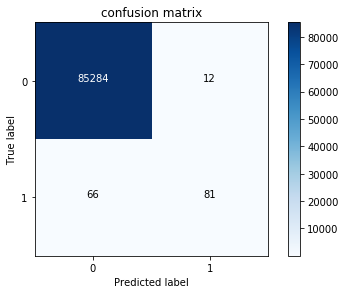

In [8]:
import itertools
# 混淆矩阵,
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

lr = LogisticRegression(C = best_c, penalty='l1')
# 对原始数据（没有经过降采样的数据）进行训练
lr.fit(X_train, y_train.values.ravel())
# print(X_test.values) 转为二维数据的形式
y_predict = lr.predict(X_test.values)
# print(len(y_predict))

cof_matrix = confusion_matrix(y_test, y_predict)
# 精度为小数点后2位
np.set_printoptions(precision=2)
print("测试集上的召回率：", cof_matrix[1,1]/(cof_matrix[1,0]+cof_matrix[1,1]))
# real
#   0 TN  FP
#   1 FN  TP 
#     0  1   predict
class_name = [0,1]   # 类别，0为负类（正常用户），1为正类（欺诈用户）
plt.figure()
plot_confusion_matrix(cof_matrix, classes=class_name, title="confusion matrix")
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


测试集上的召回率： 1.0
测试集上的召回率： 1.0
测试集上的召回率： 1.0
测试集上的召回率： 0.9863945578231292
测试集上的召回率： 0.9251700680272109
测试集上的召回率： 0.8639455782312925
测试集上的召回率： 0.8299319727891157
测试集上的召回率： 0.7414965986394558
测试集上的召回率： 0.5850340136054422


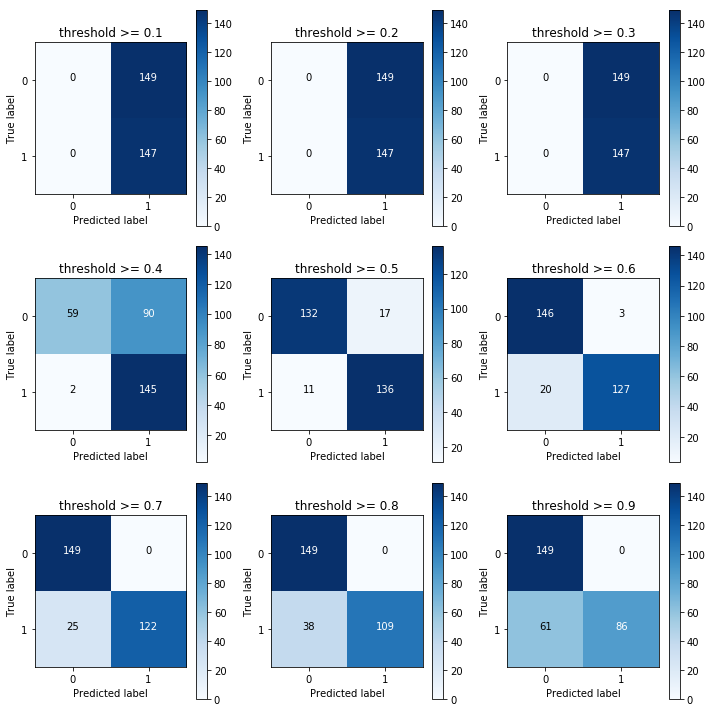

In [9]:
# 逻辑回归阈值对结果的影响
import itertools

lr = LogisticRegression(C = best_c, penalty='l1')
# 对原始数据（没有经过降采样的数据）进行训练
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
# print(X_test_undersample.values) 转为二维数据的形式
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
# print(len(y_pred_undersample_proba))

# 设置逻辑回归的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
  y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
  plt.subplot(3,3,j)
  j+=1
  # 计算混淆矩阵
  cof_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
  # 精度为小数点后2位
  np.set_printoptions(precision=2)
  print("测试集上的召回率：", cof_matrix[1,1]/(cof_matrix[1,0]+cof_matrix[1,1]))
  # real
  #   0 TN  FP
  #   1 FN  TP 
  #     0  1   predict
  class_name = [0,1]   # 类别，0为负类（正常用户），1为正类（欺诈用户）
  plot_confusion_matrix(cof_matrix, classes=class_name, title="threshold >= %s" %i)



In [26]:
# SMOTE样本生成策略---过采样
from imblearn.over_sampling import SMOTE
credit_cards = pd.read_csv("/content/drive/My Drive/data/creditcard.csv")
columns = credit_cards.columns
# 获取特征列
features_columns = columns.delete(len(columns)-1)
# print(features_columns)
features = credit_cards[features_columns]
# print(features.head())
labels = credit_cards['Class']

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=0)
print(type(features_train))
# print(features_train.head())

# 过采样（即对样本数少的类别进行过采样，使得其样本数跟另一个类别一样多）
oversample = SMOTE(random_state=0)
# 对训练集进行过采样
os_features, os_labels = oversample.fit_sample(features_train, labels_train)
# print(os_features)
# print(os_labels)
print(len(os_labels[os_labels] == 1))
print(len(os_labels[os_labels] == 0))

os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)

# 得到最佳惩罚项
best_c = printing_Kfold_scores(os_features, os_labels)


<class 'pandas.core.frame.DataFrame'>
454908
454908
